In [18]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [25]:
%matplotlib inline

In [31]:
train = json.load(open('coco/annotations/captions_train2014.json', 'r'))
val = json.load(open('coco/annotations/captions_val2014.json', 'r'))

In [7]:
print(train.keys())
print(val.keys())

dict_keys(['info', 'images', 'licenses', 'annotations'])
dict_keys(['info', 'images', 'licenses', 'annotations'])


In [8]:
print(train['info'])
print(val['info'])

{'description': 'COCO 2014 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2014, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
{'description': 'COCO 2014 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2014, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}


In [10]:
print(len(train['images']))
print(len(train['annotations']))
print(len(val['images']))
print(len(val['annotations']))

82783
414113
40504
202654


<class 'list'>
<class 'list'> 

{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895} 

{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}


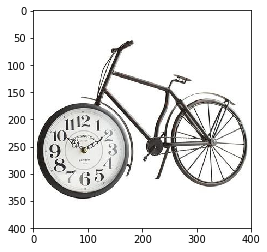

In [27]:
print(type(val['images']))
print(type(val['annotations']), '\n')
print(val['images'][0], '\n')
print(val['annotations'][0])
img = mpimg.imread('coco/images/val/COCO_val2014_000000203564.jpg')
plt.imshow(img)

In [28]:
# combine all images and annotations together
imgs = val['images'] + train['images']
annots = val['annotations'] + train['annotations']

# Group annotations by image
itoa = {}
for a in annots:
    imgid = a['image_id']
    if imgid not in itoa:
        itoa[imgid] = []
    itoa[imgid].append(a)

# Create the json blob
out = []
for i, img in enumerate(imgs):
    imgid = img['id']
    
    loc = 'train' if 'train' in img['file_name'] else 'val'
    
    jimg = {}
    jimg['file_path'] = os.path.join(loc, img['file_name'])
    jimg['id'] = imgid
    jimg['captions'] = [a['caption'] for a in itoa[imgid]]
    
    out.append(jimg)
    
json.dump(out, open('coco/coco_raw.json', 'w'))

In [32]:
raw = json.load(open('coco/coco_raw.json', 'r'))

<class 'list'>
123287 

{'file_path': 'val/COCO_val2014_000000391895.jpg', 'id': 391895, 'captions': ['A man with a red helmet on a small moped on a dirt road. ', 'Man riding a motor bike on a dirt road on the countryside.', 'A man riding on the back of a motorcycle.', 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ', 'A man in a red shirt and a red hat is on a motorcycle on a hill side.']}
(360, 640, 3)


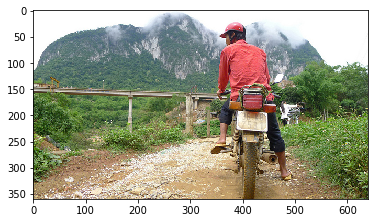

In [37]:
print(type(raw))
print(len(raw), '\n')

first_img = raw[0]
print(first_img)

image = mpimg.imread('coco/images/' + first_img['file_path'])
print(image.shape)
plt.imshow(image)

In [46]:
from collections import Counter
len_stats = Counter([len(a['caption'].split(" ")) for a in annots])
len_stats = [(k, len_stats[k]) for k in sorted(len_stats.keys())]
print(len_stats)

[(8, 92355), (9, 129642), (10, 133408), (11, 99968), (12, 65081), (13, 38554), (14, 22294), (15, 12801), (16, 7564), (17, 4710), (18, 3035), (19, 2070), (20, 1390), (21, 996), (22, 698), (23, 519), (24, 355), (25, 270), (26, 196), (27, 174), (28, 98), (29, 74), (30, 58), (31, 54), (32, 56), (33, 38), (34, 40), (35, 43), (36, 23), (37, 14), (38, 22), (39, 17), (40, 27), (41, 22), (42, 20), (43, 13), (44, 13), (45, 14), (46, 10), (47, 10), (48, 7), (49, 8), (50, 1), (51, 3), (52, 1), (179, 1)]
